In [3]:
%pip install matplotlib seaborn numpy

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 1.6 MB/s eta 0:00:05
   ----- ---------------------------------- 1.0/8.1 MB 2.1 MB/s eta 0:00:04
   --------- ------------------------------ 1.8/8.1 MB 2.6 MB/s eta 0:00:03
   -------------- ------------------------- 2.9/8.1 MB 3.0 MB/s eta 0:00:02
   ------------------- -------------------- 3.9/8.1 MB 3.6 MB/s eta 0:00:02
   ------------------------- -------------- 5.2/8.1 MB 3.9 MB/s eta 0:00:01
   ----------------------------------- ---- 7.1/8.1 MB 4.5 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 4.7 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8

In [5]:
import pandas as pd

In [6]:
# pour un meilleur style de plot
sns.set(style="whitegrid")


#Chargement du fichier CSV 
df = pd.read_csv("DataFrame.csv", encoding="utf-8")

#Aperçu
df.head()


# Comptage des données manquantes au sens large
def compter_manquants(col):
    return ((col.isna()) | (col == "") | (col == "Non disponible")).sum()

# Application à chaque colonne
manquants = df.apply(compter_manquants)

# Affichage
print("Nombre de données manquantes par colonne (NaN, vide, ou 'Non disponible') :\n")
print(manquants.sort_values(ascending=False))

Nombre de données manquantes par colonne (NaN, vide, ou 'Non disponible') :

Base_Severity         95050
CVSS_score            95050
CWE                   76929
CWE_description       67944
Versions_affectees    29349
Editeur                6512
Produit                3526
EPSS_score              255
Date_publication          0
Titre_ANSSI               0
Type                      0
ID_ANSSI                  0
CVE_ID                    0
Lien_bulletin             0
Description               0
dtype: int64


Text(0, 0.5, 'Nombre de CVE')

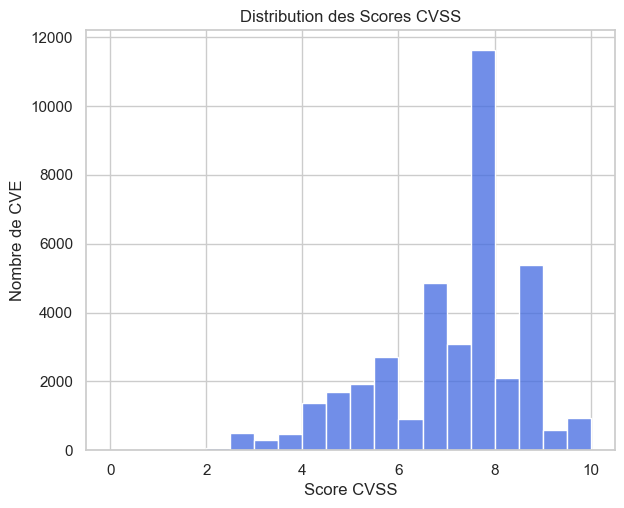

In [12]:
fig = plt.figure(figsize=(15, 12))

# 1. Histogramme Score CVSS
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='CVSS_score', bins=20, color='royalblue')
plt.title('Distribution des Scores CVSS')
plt.xlabel('Score CVSS')
plt.ylabel('Nombre de CVE')

Text(0.5, 1.0, 'Distribution des Types de Vulnérabilités (CWE)')

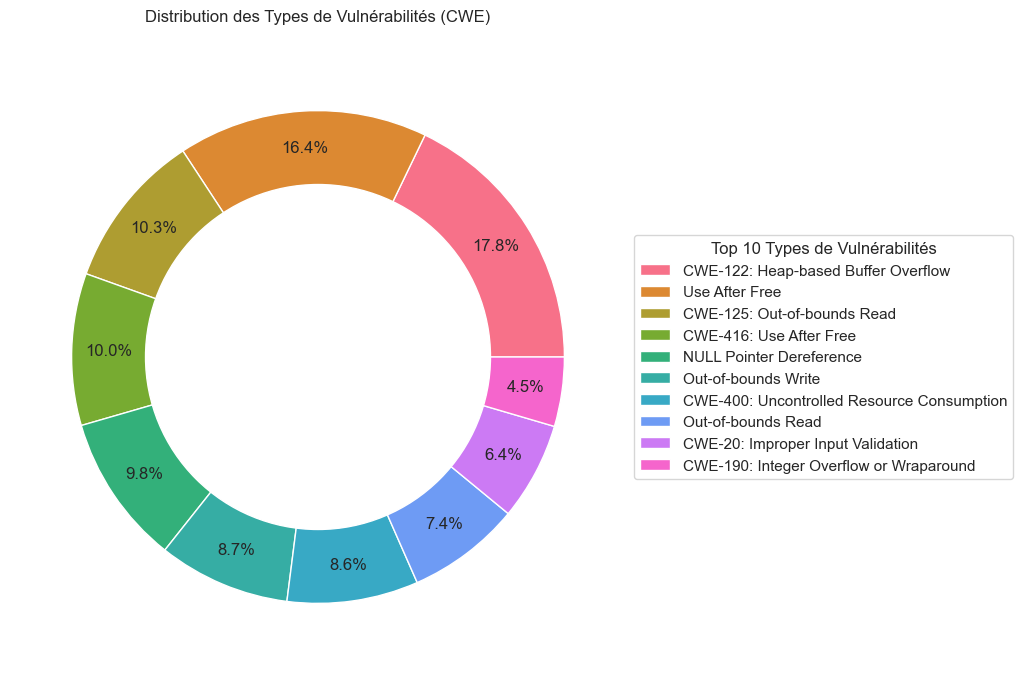

In [ ]:
plt.figure(figsize=(20, 8))

# 2. Diagramme circulaire des types de vulnérabilités (CWE)
plt.subplot(1, 2, 1)
# Filter out "Non disponible" and get top 10 CWEs
cwe_data = df[df['CWE_description'] != 'Non disponible']['CWE_description'].value_counts().head(10)

# Create pie chart with better formatting
colors = sns.color_palette('husl', n_colors=len(cwe_data))
patches, texts, autotexts = plt.pie(cwe_data.values, 
                                   colors=colors,
                                   autopct='%1.1f%%',
                                   pctdistance=0.85)

# Add a circle at the center to create a donut chart
centre_circle = plt.Circle((0,0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

# Improve legend
plt.legend(patches, cwe_data.index,
          title="Top 10 Types de Vulnérabilités",
          loc="center left",
          bbox_to_anchor=(1, 0.5))
plt.title('Distribution des Types de Vulnérabilités (CWE)', pad=20)

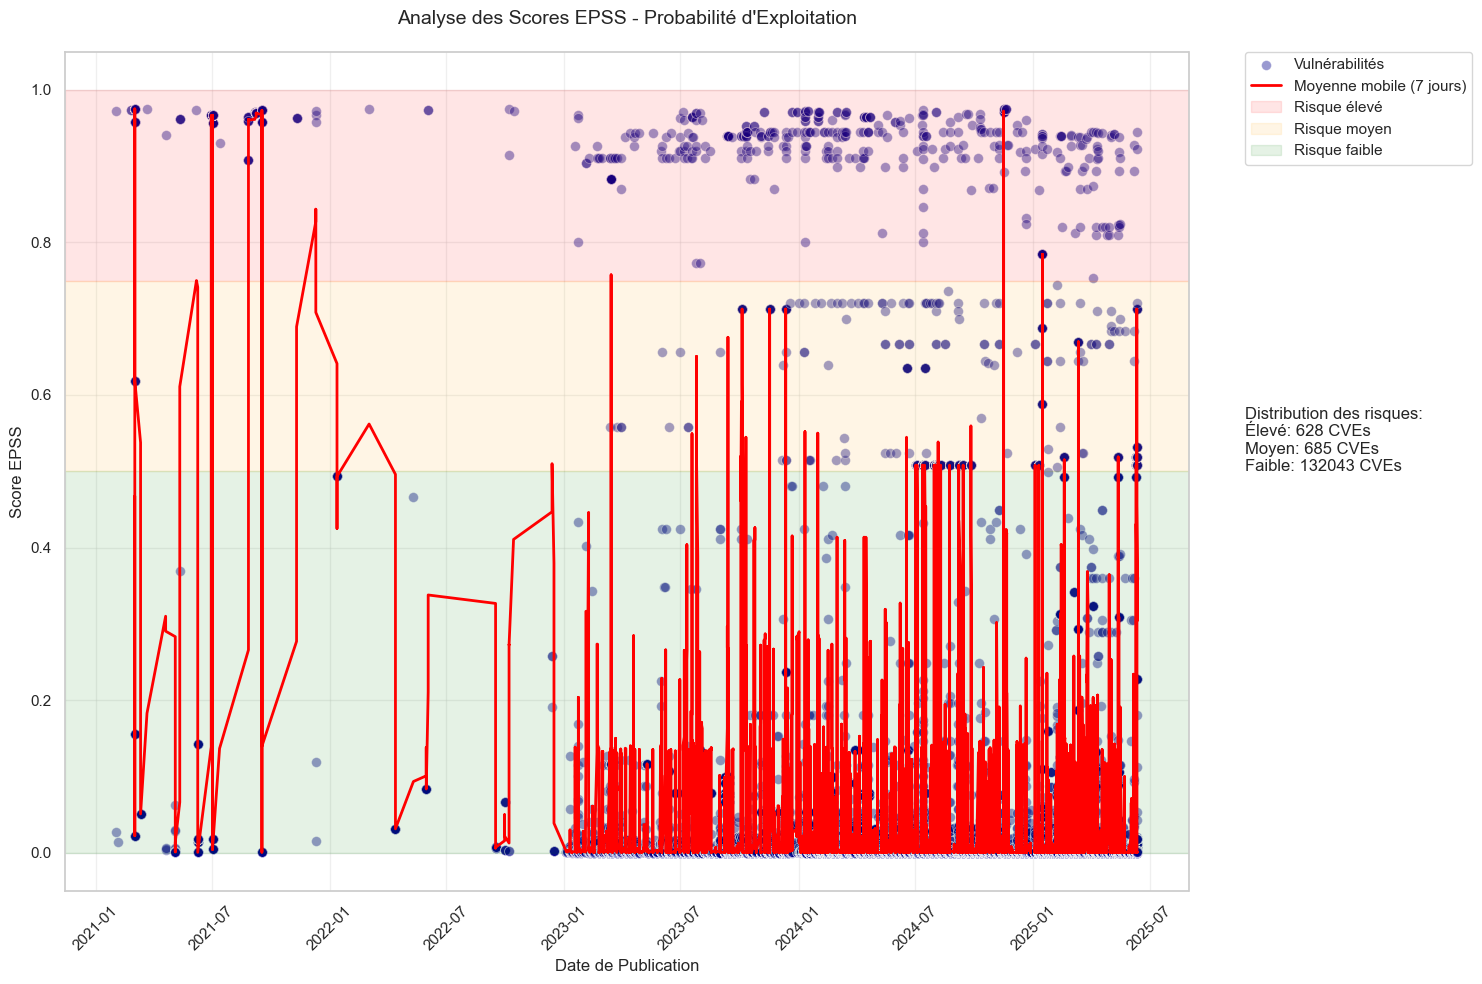


Statistiques des Scores EPSS:
count    133356.000000
mean          0.010361
std           0.077985
min           0.000020
25%           0.000420
50%           0.000450
75%           0.000810
max           0.975150
Name: EPSS_score, dtype: float64


In [22]:
# 3. Courbe des scores EPSS

df['Date_publication'] = pd.to_datetime(df['Date_publication'])
df_sorted = df.sort_values('Date_publication')

# Create main visualization
plt.figure(figsize=(15, 10))

# 1. Scatter plot of vulnerabilities
sns.scatterplot(data=df_sorted, 
                x='Date_publication',
                y='EPSS_score',
                alpha=0.4,
                color='darkblue',
                s=50,
                label='Vulnérabilités')

# 2. Add moving average (7 days)
df_sorted['MA7'] = df_sorted['EPSS_score'].rolling(window=7).mean()
plt.plot(df_sorted['Date_publication'], 
         df_sorted['MA7'], 
         color='red', 
         linewidth=2, 
         label='Moyenne mobile (7 jours)')

# 3. Add risk zones
plt.axhspan(0.75, 1.0, color='red', alpha=0.1, label='Risque élevé')
plt.axhspan(0.5, 0.75, color='orange', alpha=0.1, label='Risque moyen')
plt.axhspan(0, 0.5, color='green', alpha=0.1, label='Risque faible')

# 4. Customize appearance
plt.title('Analyse des Scores EPSS - Probabilité d\'Exploitation', fontsize=14, pad=20)
plt.xlabel('Date de Publication', fontsize=12)
plt.ylabel('Score EPSS', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# 5. Add informative legend
plt.legend(bbox_to_anchor=(1.05, 1), 
          loc='upper left', 
          borderaxespad=0.)

# 6. Add risk statistics annotations
high_risk = len(df[df['EPSS_score'] > 0.75])
medium_risk = len(df[(df['EPSS_score'] > 0.5) & (df['EPSS_score'] <= 0.75)])
low_risk = len(df[df['EPSS_score'] <= 0.5])

stats_text = f'Distribution des risques:\nÉlevé: {high_risk} CVEs\nMoyen: {medium_risk} CVEs\nFaible: {low_risk} CVEs'
plt.text(1.05, 0.5, stats_text, 
         transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nStatistiques des Scores EPSS:")
print(df['EPSS_score'].describe())